In [1]:
import os
import re
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
fitnesses_file = '../era-outs/jester-out-spea-4-1run/best_ind_binaries/archive-u1-run0/archive_fitnesses.log'

In [3]:
lines = !grep "\[" {fitnesses_file}
lines

['Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]',
 'Fitness: [0.20445623699542997 0.7445203811677115 0.27560847185835285]']

In [4]:
def extract_fitness_values(line):
    value_strings = line[line.find('[') + 1:line.find(']')].split()
    return tuple(float(s) for s in value_strings)

fitness_values = [extract_fitness_values(line) for line in lines]
fitness_values

[(0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285),
 (0.20445623699542997, 0.7445203811677115, 0.27560847185835285)]

In [5]:
frame = pd.DataFrame.from_records(fitness_values, columns=('map', 'epc', 'eild'))
frame

,map,epc,eild
0,0.204456,0.74452,0.275608
1,0.204456,0.74452,0.275608
2,0.204456,0.74452,0.275608
3,0.204456,0.74452,0.275608
4,0.204456,0.74452,0.275608
5,0.204456,0.74452,0.275608
6,0.204456,0.74452,0.275608
7,0.204456,0.74452,0.275608
8,0.204456,0.74452,0.275608
9,0.204456,0.74452,0.275608


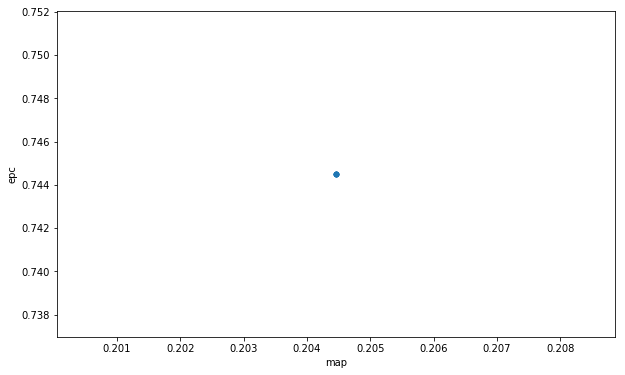

In [6]:
frame.plot.scatter('map', 'epc')